<a href="https://colab.research.google.com/github/tobenson21/Data_Enginner/blob/main/tareaVisualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizacion de dataset con Matplotlib

In [ ]:
#Importacion de librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Conectar con drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carga y visualizacion de dataset

In [ ]:
#Extraer dataset desde drive a colab
data = '/content/drive/MyDrive/Estudio_Diplomado/tareaVisualizacion/M7.EV.DS - Dataset.csv'
df = pd.read_csv(data, sep=',', encoding='latin-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#Ventas de producto por pais antes del procesamiento
cantProduct = df.groupby('Country')['Quantity'].sum()
cantProduct

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


In [ ]:
df['Country'].nunique()

38

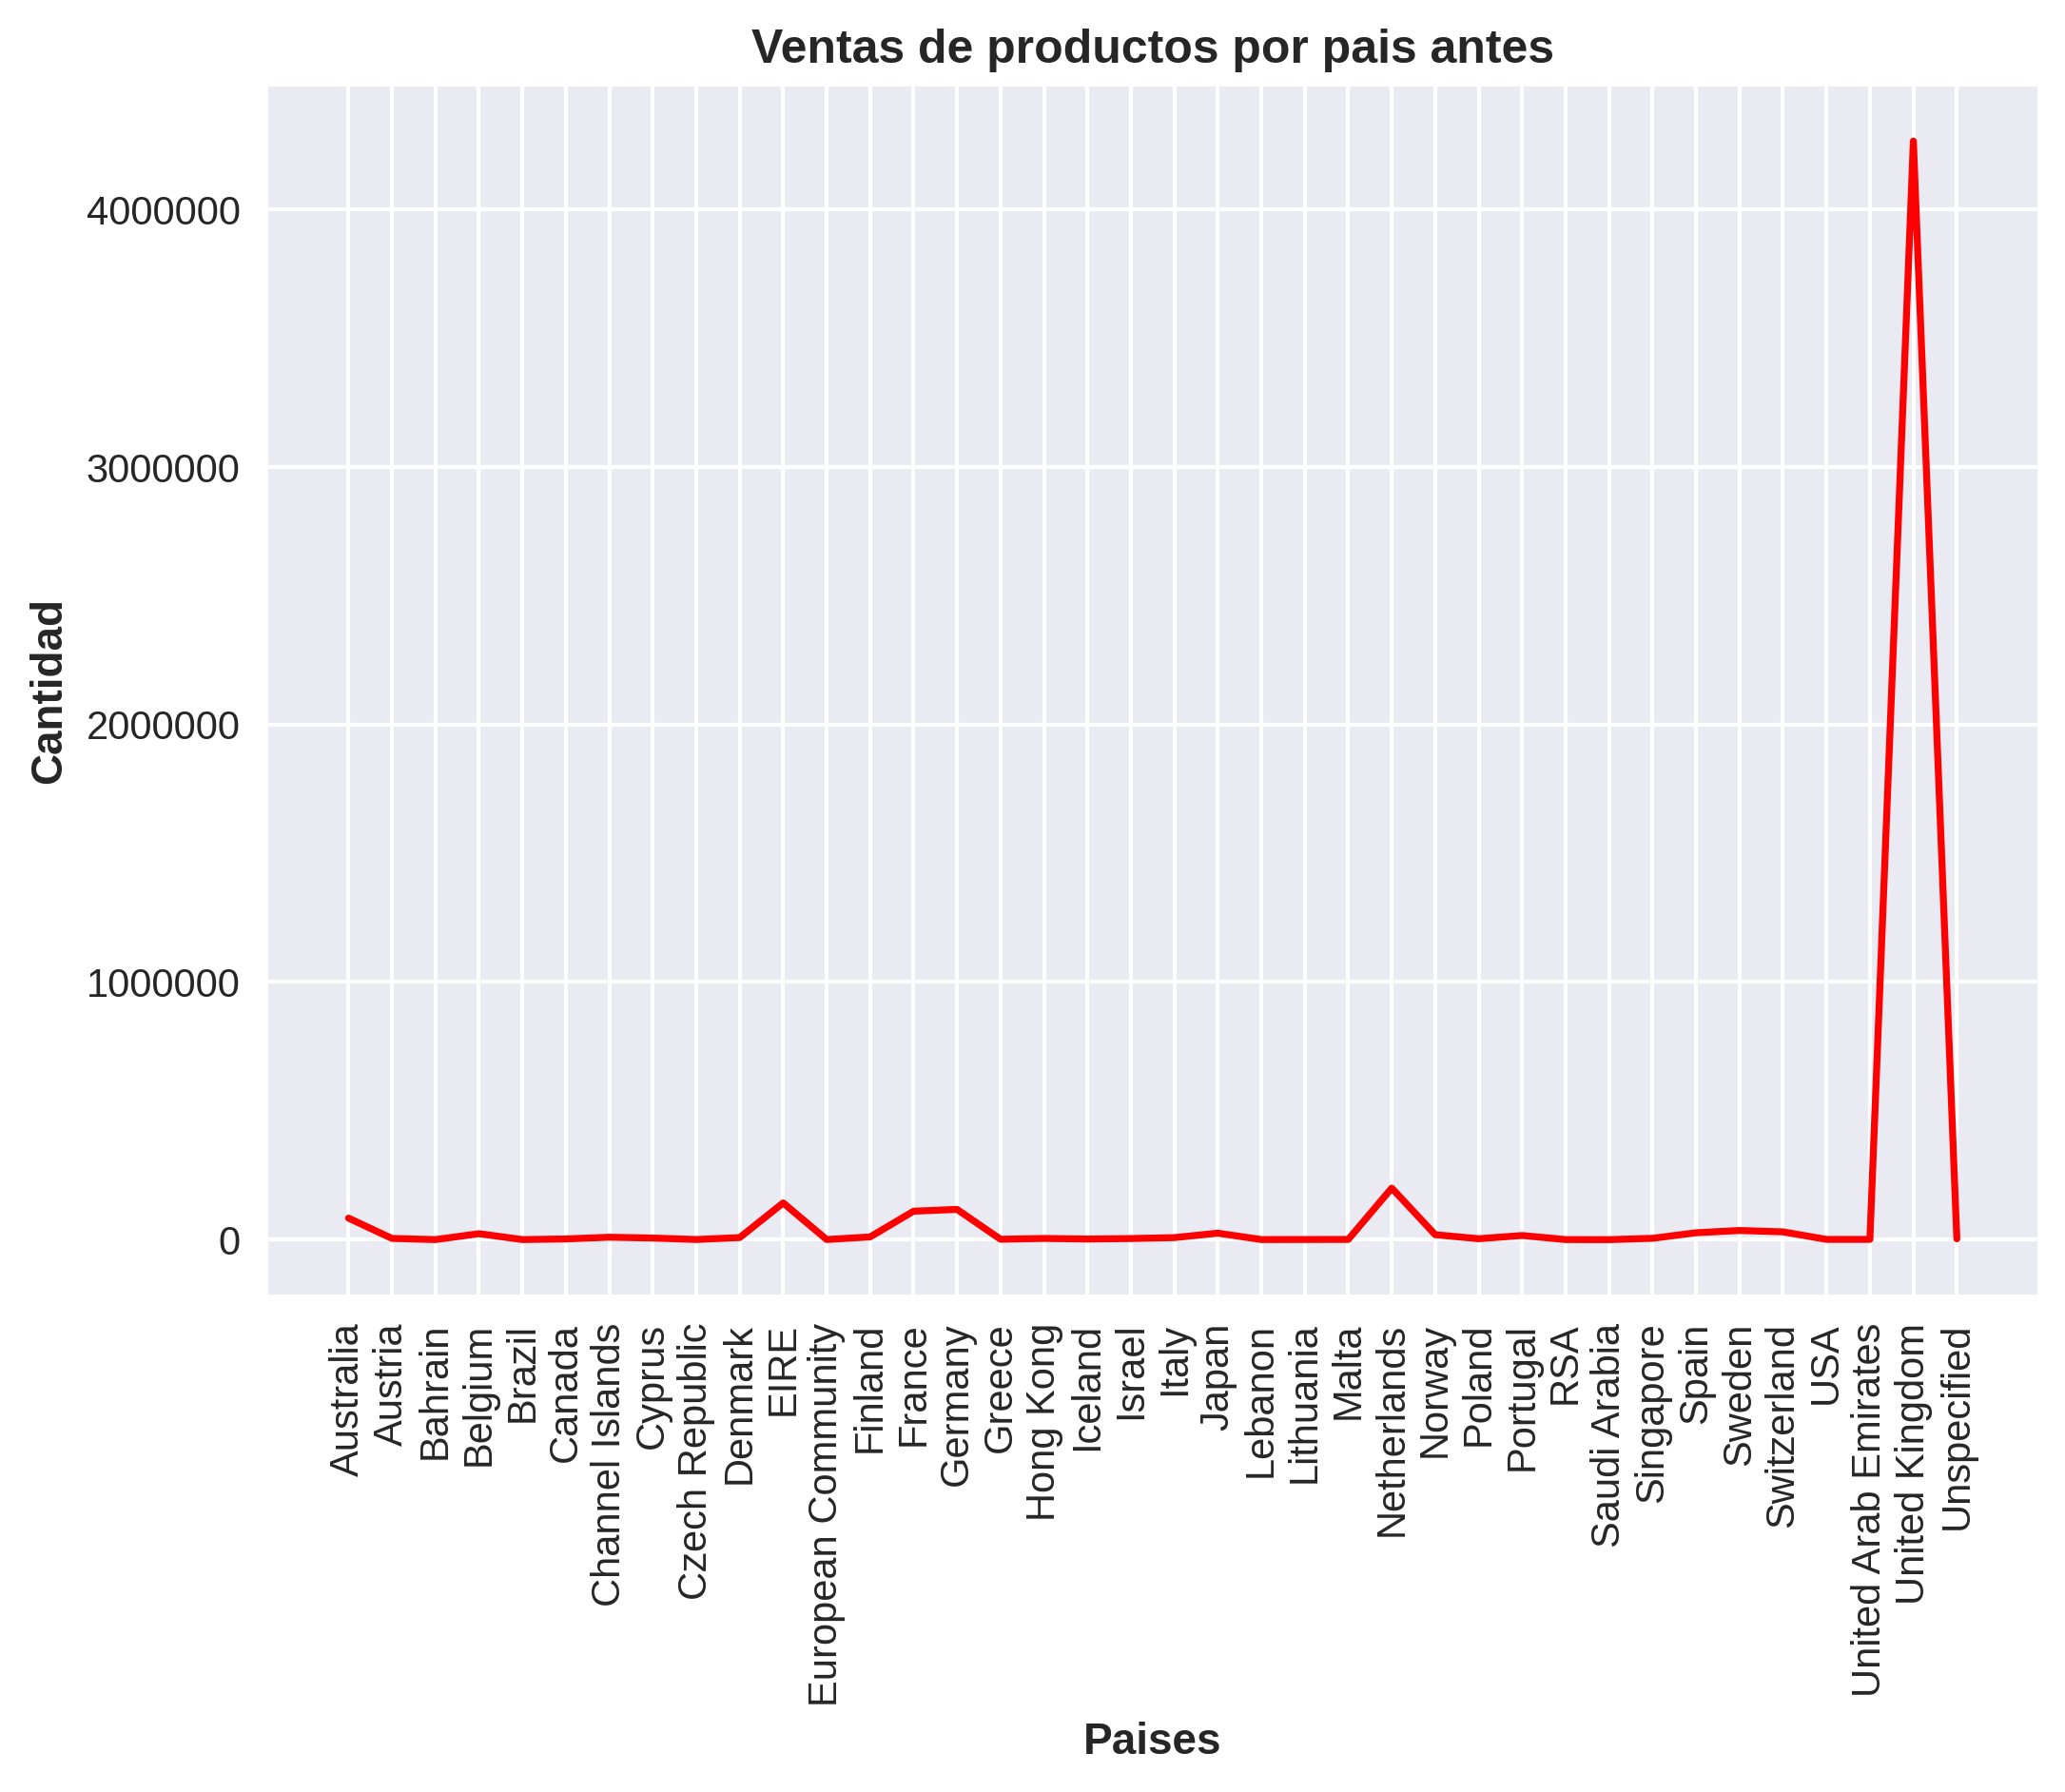

In [ ]:
#Grafica de ventas de producto por pais antes del procesamiento
plt.figure(dpi=300)
plt.style.use('seaborn-v0_8')
plt.plot(cantProduct, mouseover= True, color='r')
plt.title('Ventas de productos por pais antes', fontweight='bold')
plt.xlabel('Paises', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.xticks(rotation= 90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
#Compra de mes desde primer mes hasta ultimo mes antes del procesamiento
buymonthbefore = df.groupby(df['InvoiceDate'].apply(lambda x: x[:7]))['Quantity'].sum()
buymonthbefore

,Quantity
InvoiceDate,
2010-12,342228
2011-01,308966
2011-02,277989
2011-03,351872
2011-04,289098
2011-05,380391
2011-06,341623
2011-07,391116
2011-08,406199


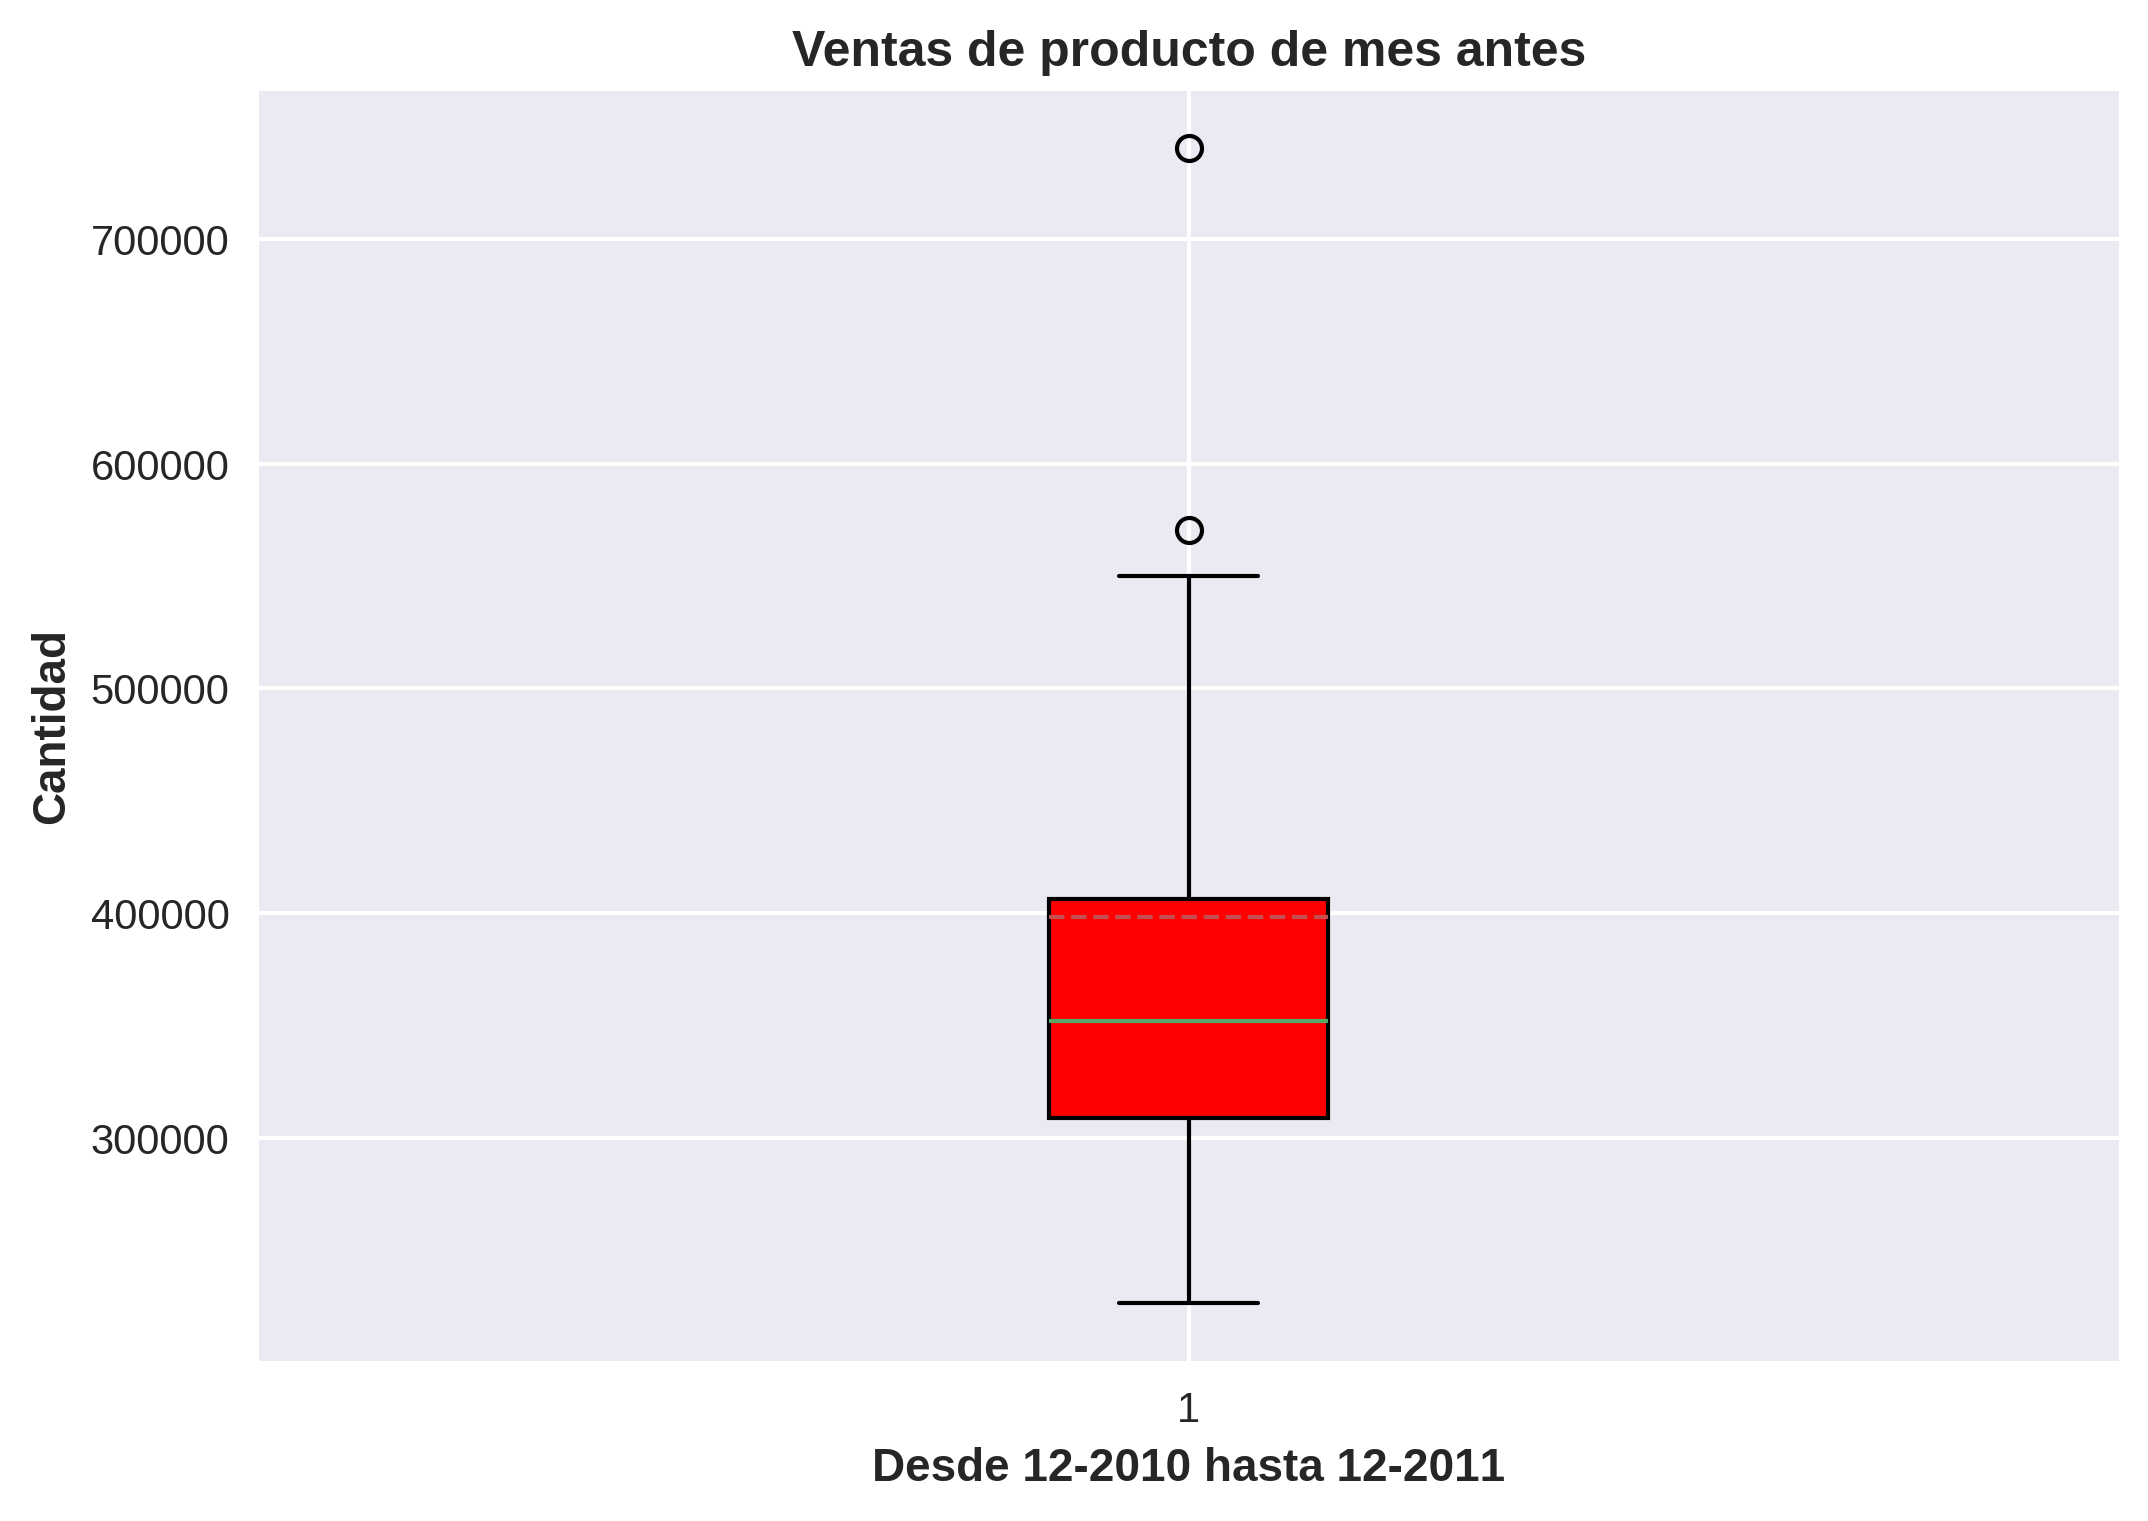

In [ ]:
#Grafica de compra de mes desde primer mes hasta ultimo mes antes del procesamiento
plt.figure(dpi=300)
plt.boxplot(buymonthbefore,vert = True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='red'))
plt.title('Ventas de producto de mes antes', fontweight='bold')
plt.xlabel('Desde 12-2010 hasta 12-2011', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

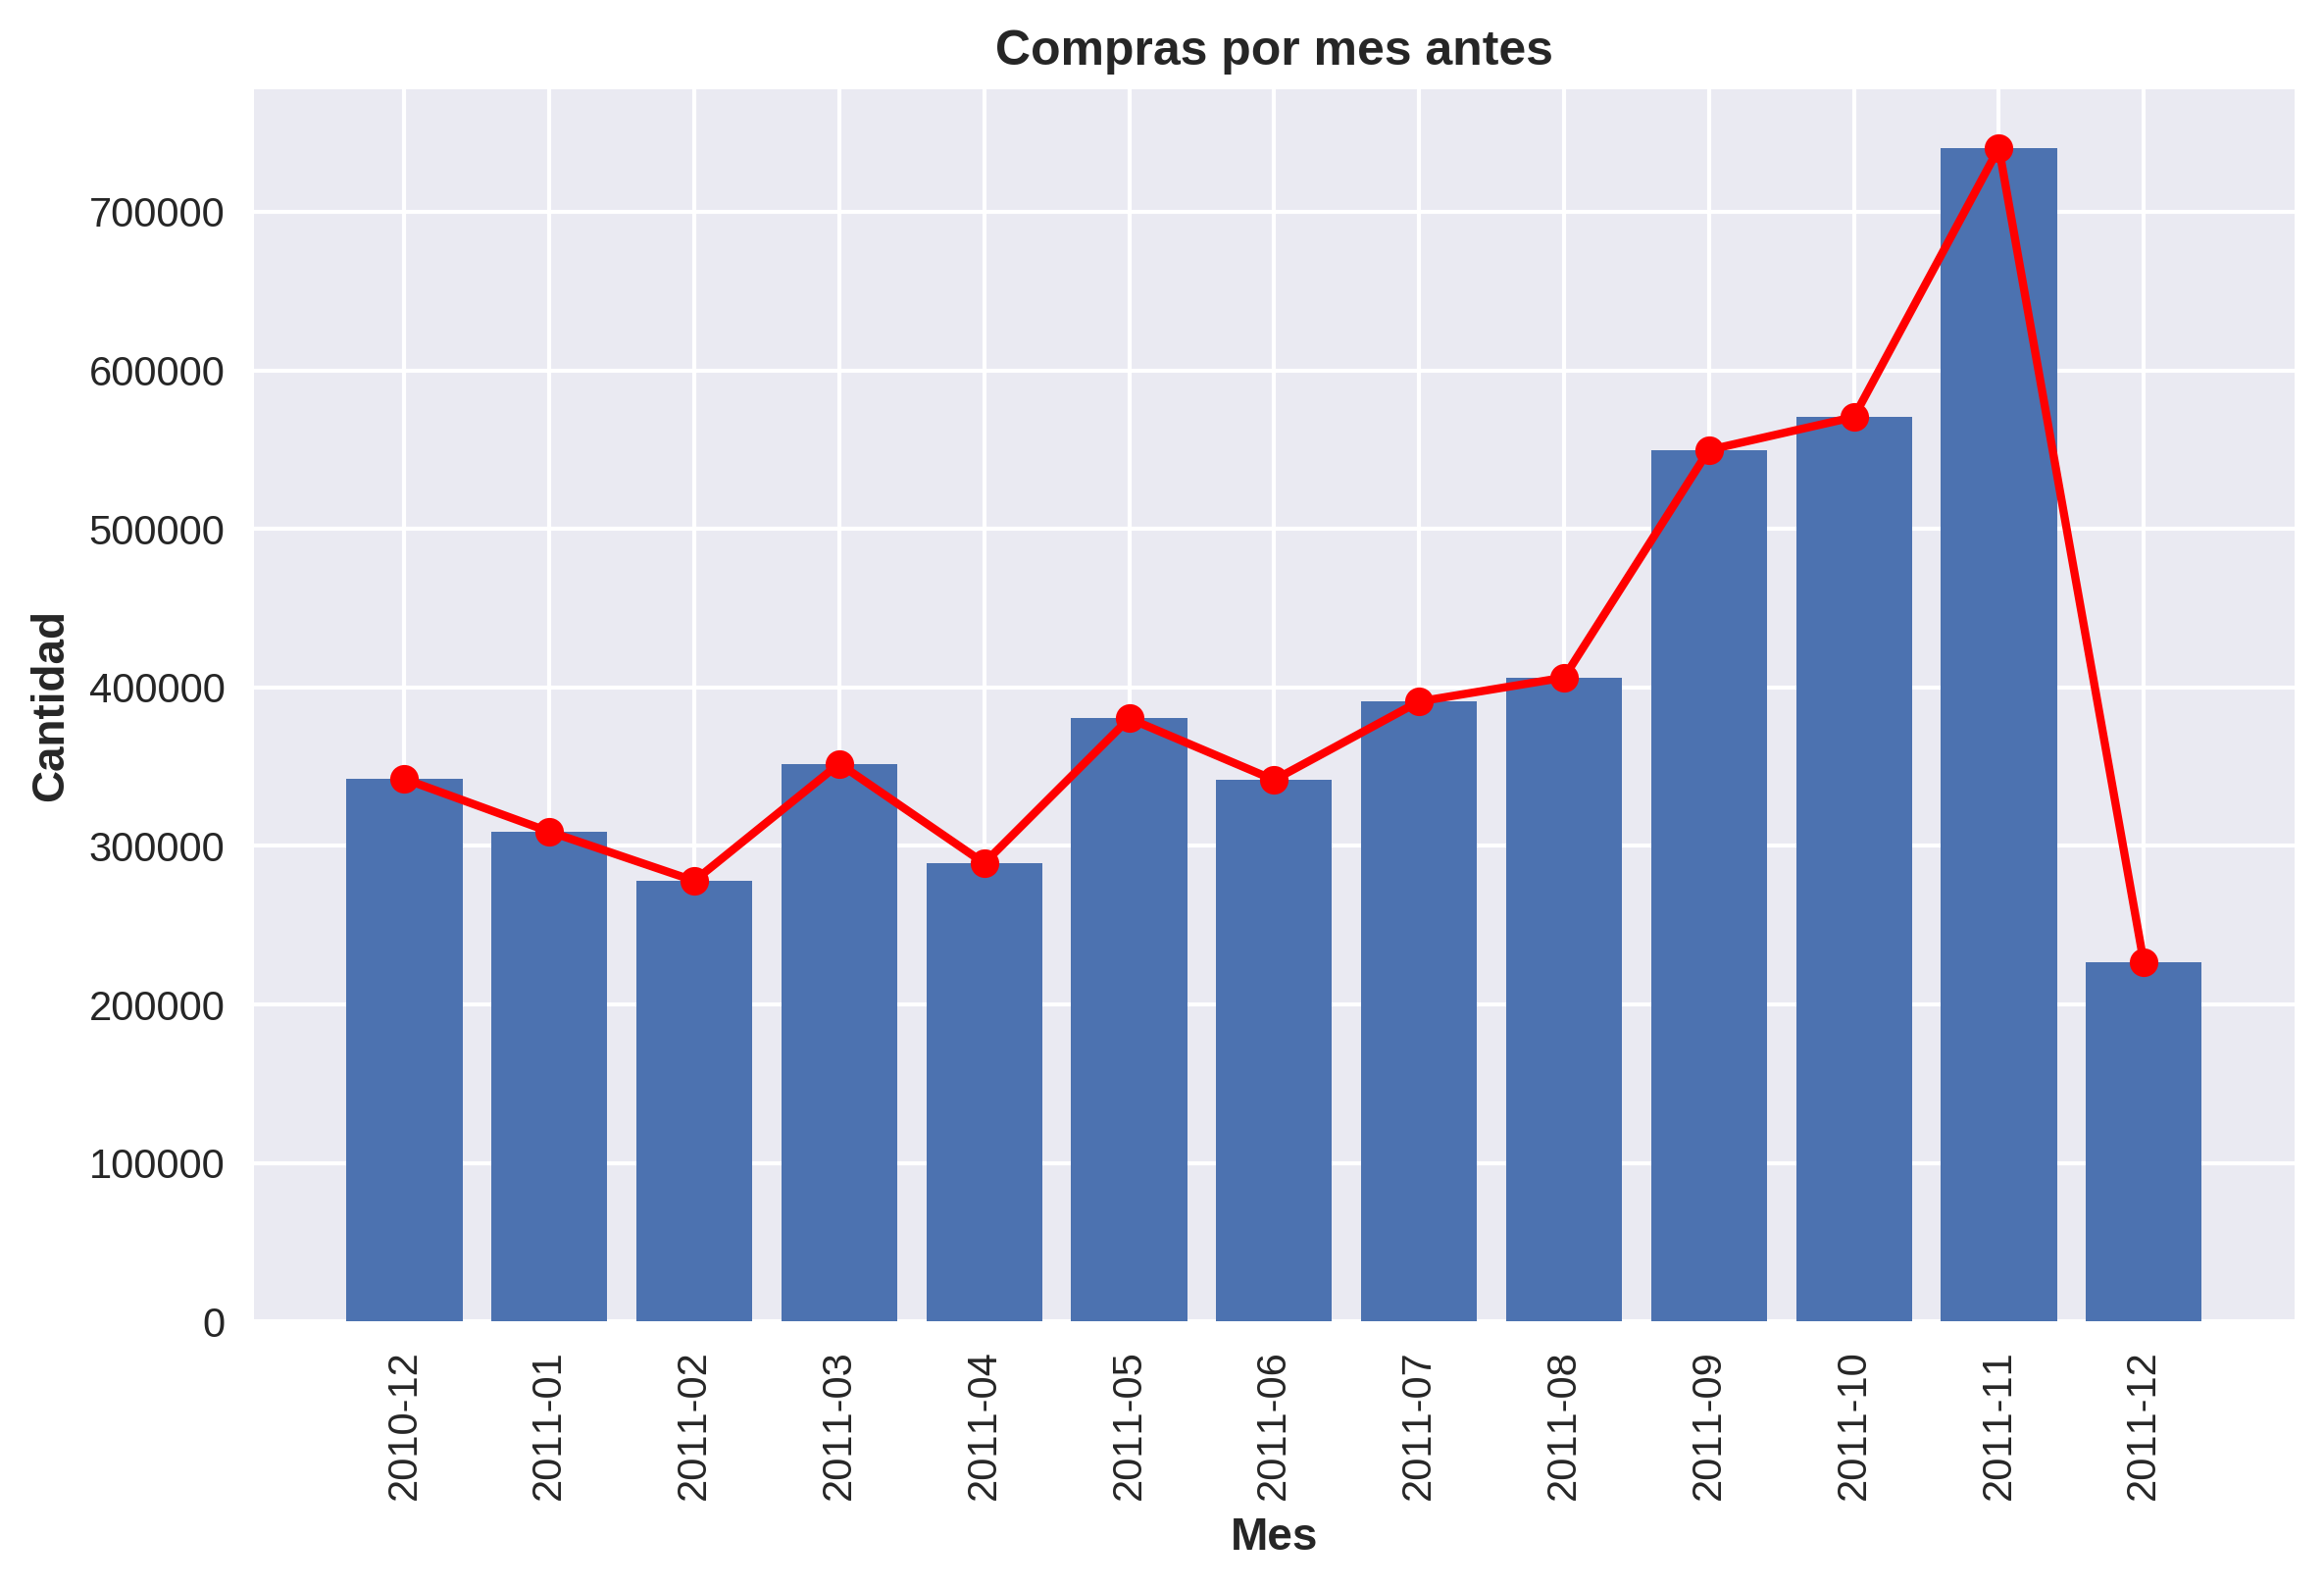

In [ ]:
#Grafica de compra por mes desde primer mes hasta ultimo mes antes del procesamiento
plt.figure(dpi=300)
plt.plot(buymonthbefore.index, buymonthbefore.values, linewidth=2, color='r', marker='o', markersize=7)
plt.bar(buymonthbefore.index, buymonthbefore.values, linewidth=2 )
plt.xticks(rotation=90)
plt.title('Compras por mes antes', fontweight= 'bold')
plt.xlabel('Mes', fontweight= 'bold')
plt.ylabel('Cantidad', fontweight= 'bold')
plt.tight_layout()
plt.show()

In [ ]:
#Borrar datos nulos, negativos e inconsistentes
df.dropna(inplace=True)
df.drop(df[df['Quantity'] < 1 ].index, inplace=True)
df.drop(df[df['UnitPrice'] < 1 ].index, inplace=True)
df.drop(df[df['Description'] == 'Manual'].index, inplace=True)
df.drop(df[df['Country'] == 'Unspecified'].index, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Cambiar nombres:

EIRE por Ireland\
RSA por South Africa\
Channel Islands

In [ ]:
#Cambio de nombre de paises
df['Country'].replace('EIRE', 'Ireland', inplace=True)
df['Country'].replace('RSA', 'South Africa', inplace=True)
df['Country'].replace('Channel Islands', 'United Kingdom', inplace=True)

<ipython-input-86-0177eefe6c27>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace('EIRE', 'Ireland', inplace=True)
<ipython-input-86-0177eefe6c27>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Denmark',
       'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'South Africa'], dtype=object)

In [ ]:
df['Country'].nunique()

35

In [ ]:
##Ventas de producto por pais despues del procesamiento
cantProductNew = df.groupby('Country')['Quantity'].sum()
cantProductNew

,Quantity
Country,
Australia,52611
Austria,2925
Bahrain,260
Belgium,12068
Brazil,332
Canada,1431
Cyprus,3649
Czech Republic,255
Denmark,5758


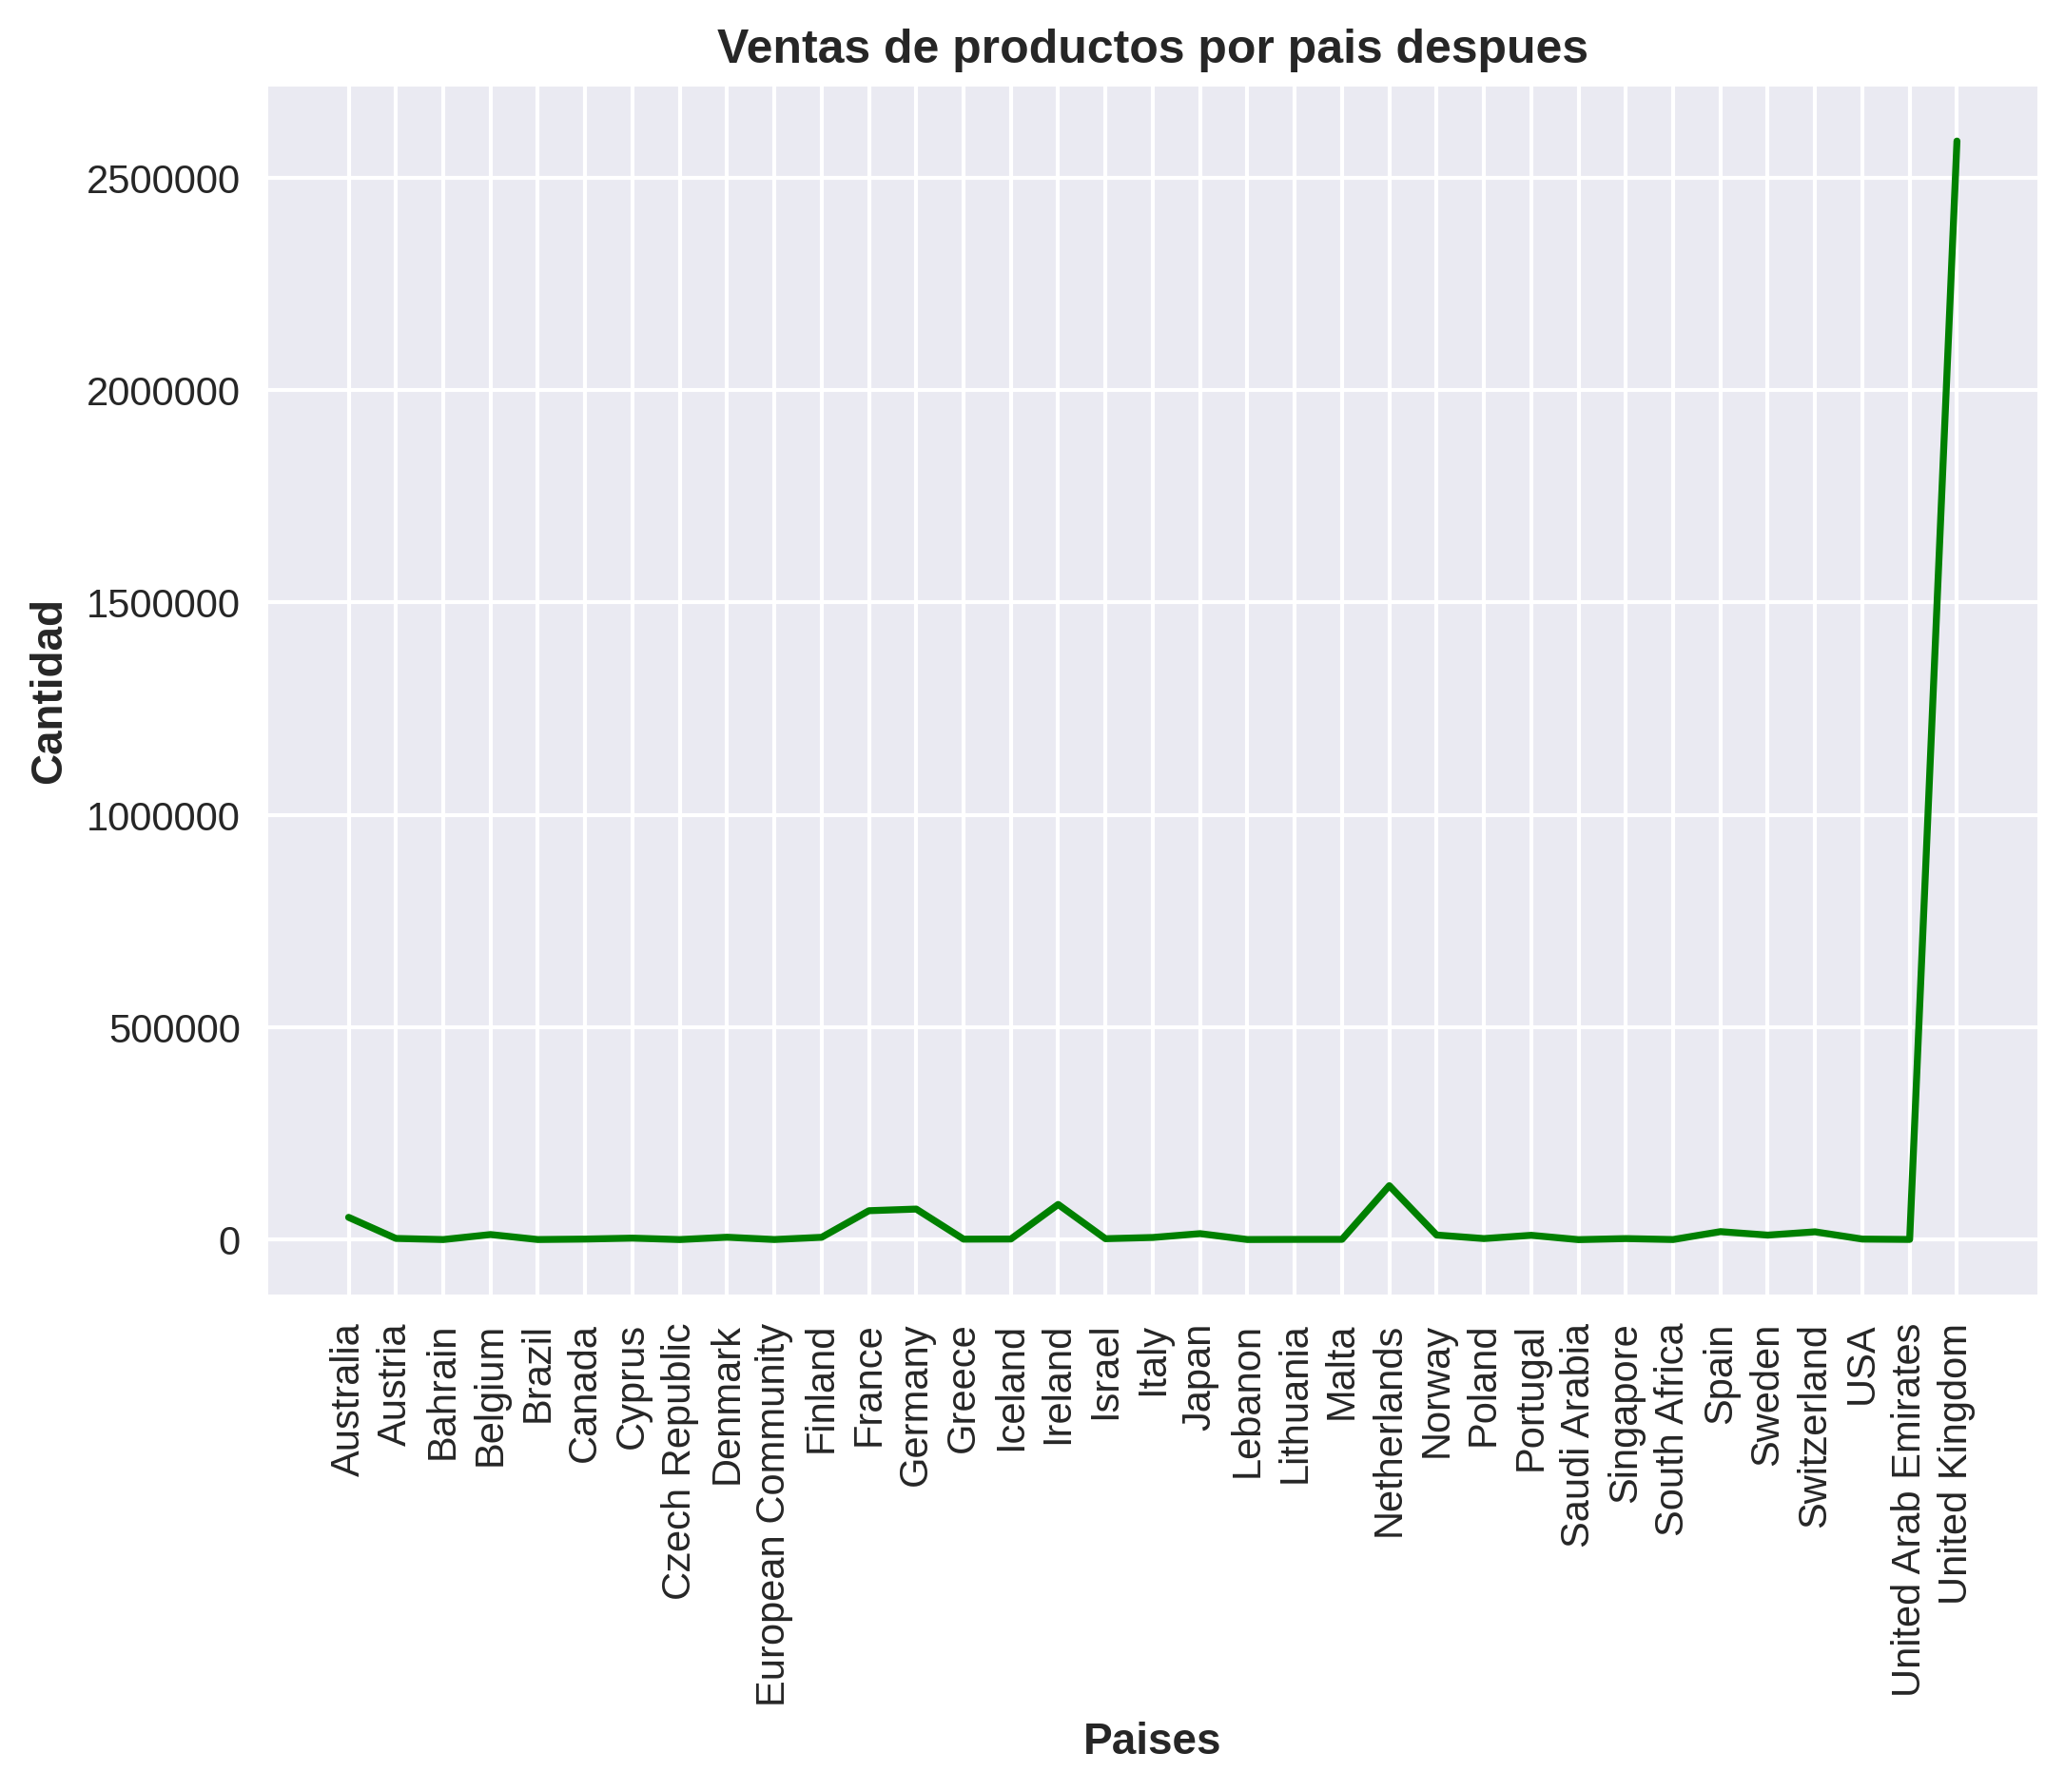

In [ ]:
#Grafica de ventas de producto por pais antes del procesamiento
plt.figure(dpi=300)
plt.plot(cantProductNew, color= 'g')
plt.title('Ventas de productos por pais despues', fontweight='bold')
plt.xlabel('Paises', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.xticks(rotation= 90)
plt.style.use('seaborn-v0_8')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
#Compra de mes desde primer mes hasta ultimo mes despues del procesamiento
buymonthbeforenew = df.groupby(df['InvoiceDate'].apply(lambda x: x[:7]))['Quantity'].sum()
buymonthbeforenew

,Quantity
InvoiceDate,
2010-12,191690
2011-01,246021
2011-02,154012
2011-03,207384
2011-04,158531
2011-05,224594
2011-06,211591
2011-07,198891
2011-08,244768


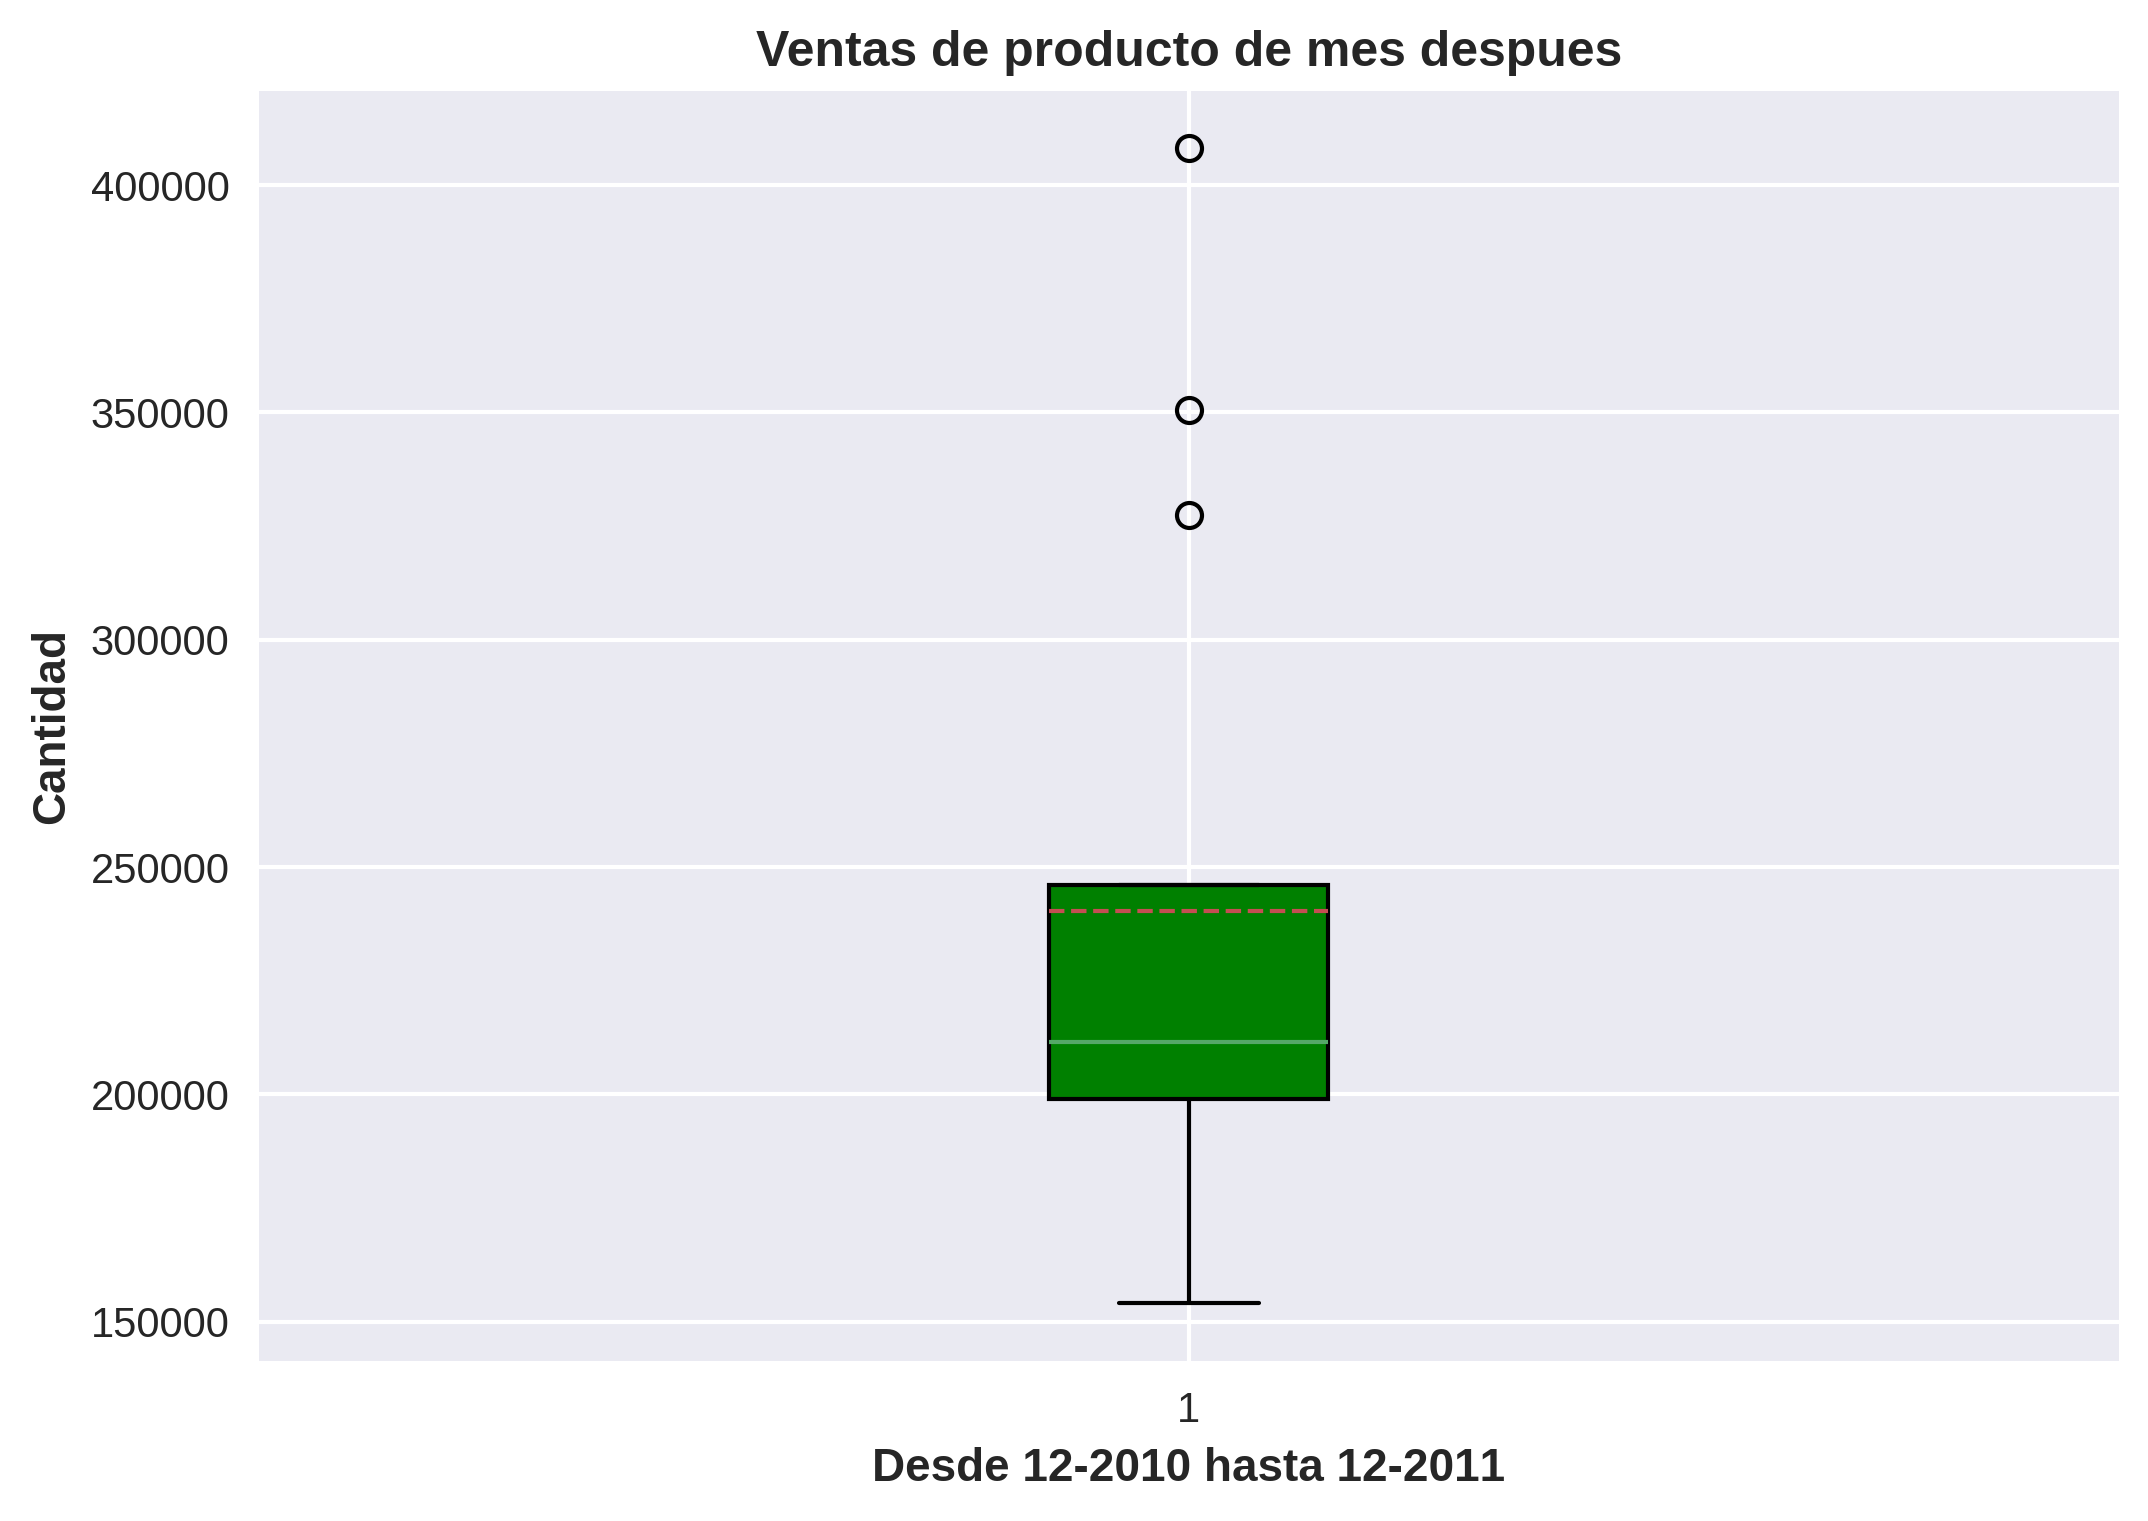

In [ ]:
#Grafica de compra de mes desde primer mes hasta ultimo mes despues del procesamiento
plt.figure(dpi=300)
plt.boxplot(buymonthbeforenew, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='green'))
plt.title('Ventas de producto de mes despues', fontweight='bold')
plt.xlabel('Desde 12-2010 hasta 12-2011', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

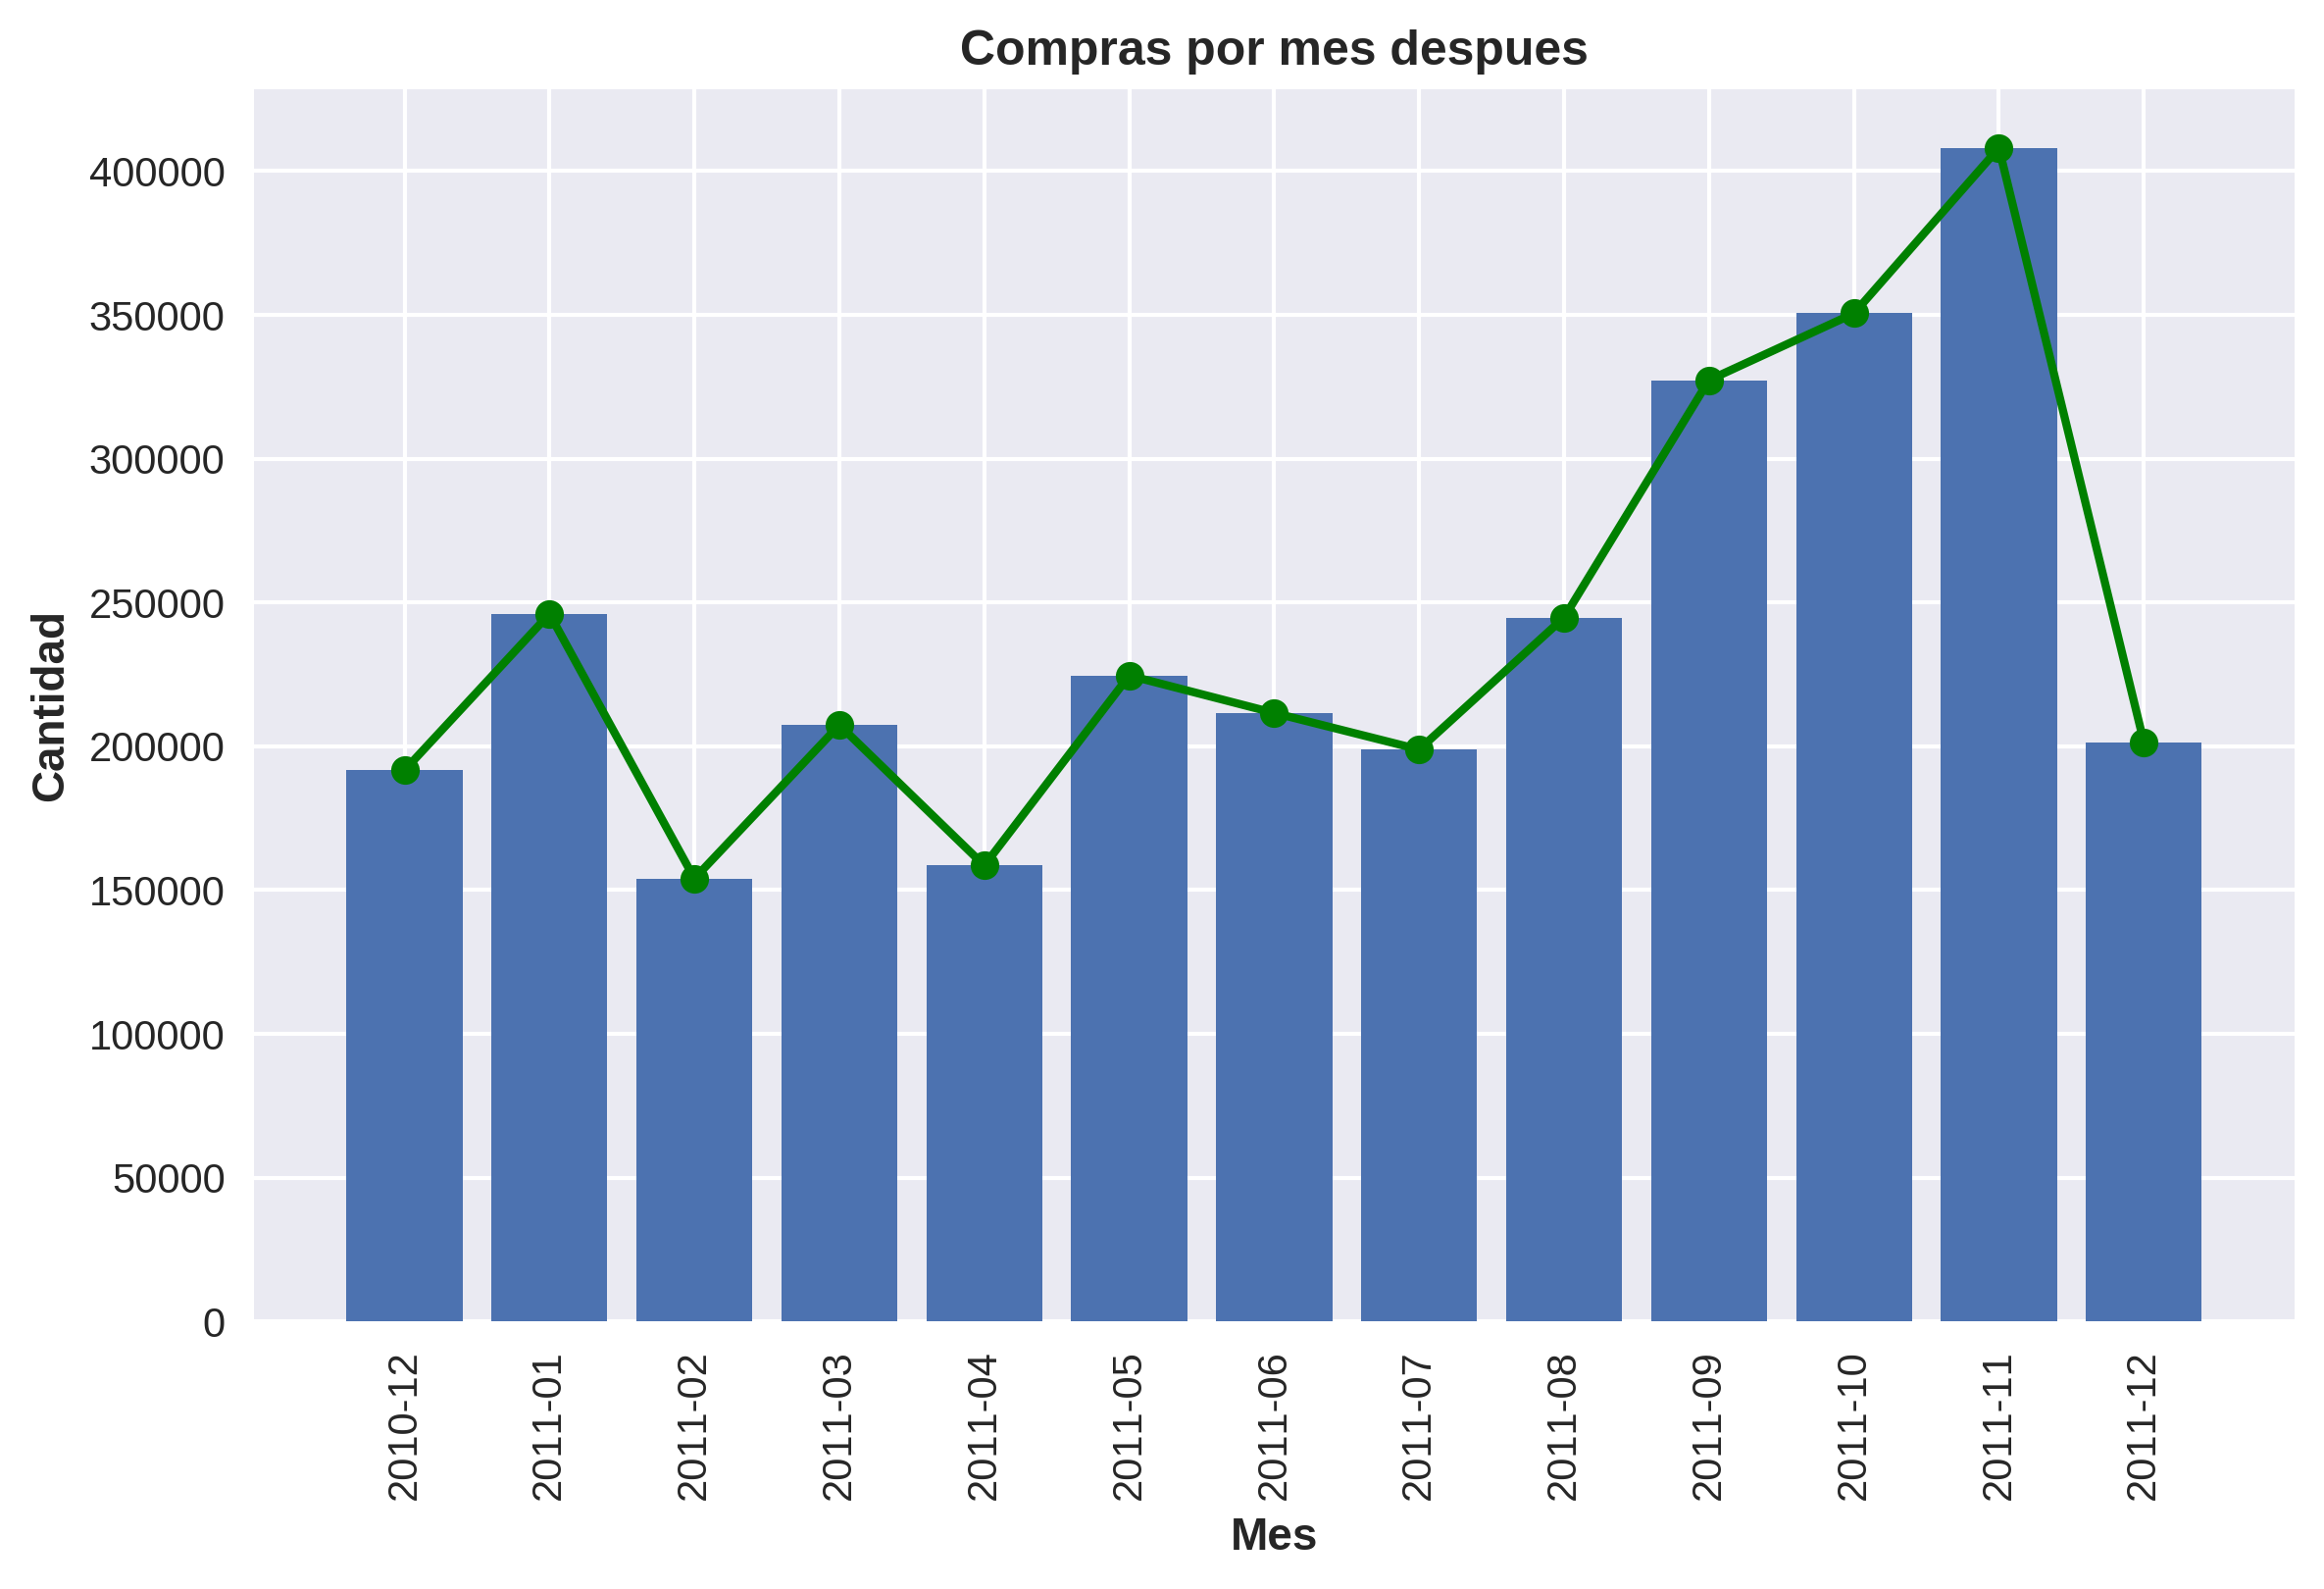

In [ ]:
#Grafica de compra por mes desde primer mes hasta ultimo mes despues del procesamiento
plt.figure(dpi=300)
plt.plot(buymonthbeforenew.index, buymonthbeforenew.values, linewidth=2, color='g', marker='o', markersize=7)
plt.bar(buymonthbeforenew.index, buymonthbeforenew.values, linewidth=2 )
plt.xticks(rotation=90)
plt.title('Compras por mes despues', fontweight= 'bold')
plt.xlabel('Mes', fontweight= 'bold')
plt.ylabel('Cantidad', fontweight= 'bold')
plt.tight_layout()
plt.show()

# Pregunta N°1
¿Cuáles son los productos favoritos o qué más compran los clientes?

In [ ]:
mostsellprod = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
mostsellprod

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35340
RABBIT NIGHT LIGHT,27202
RED HARMONICA IN BOX,20939
VICTORIAN GLASS HANGING T-LIGHT,20321
JUMBO BAG PINK POLKADOT,20165


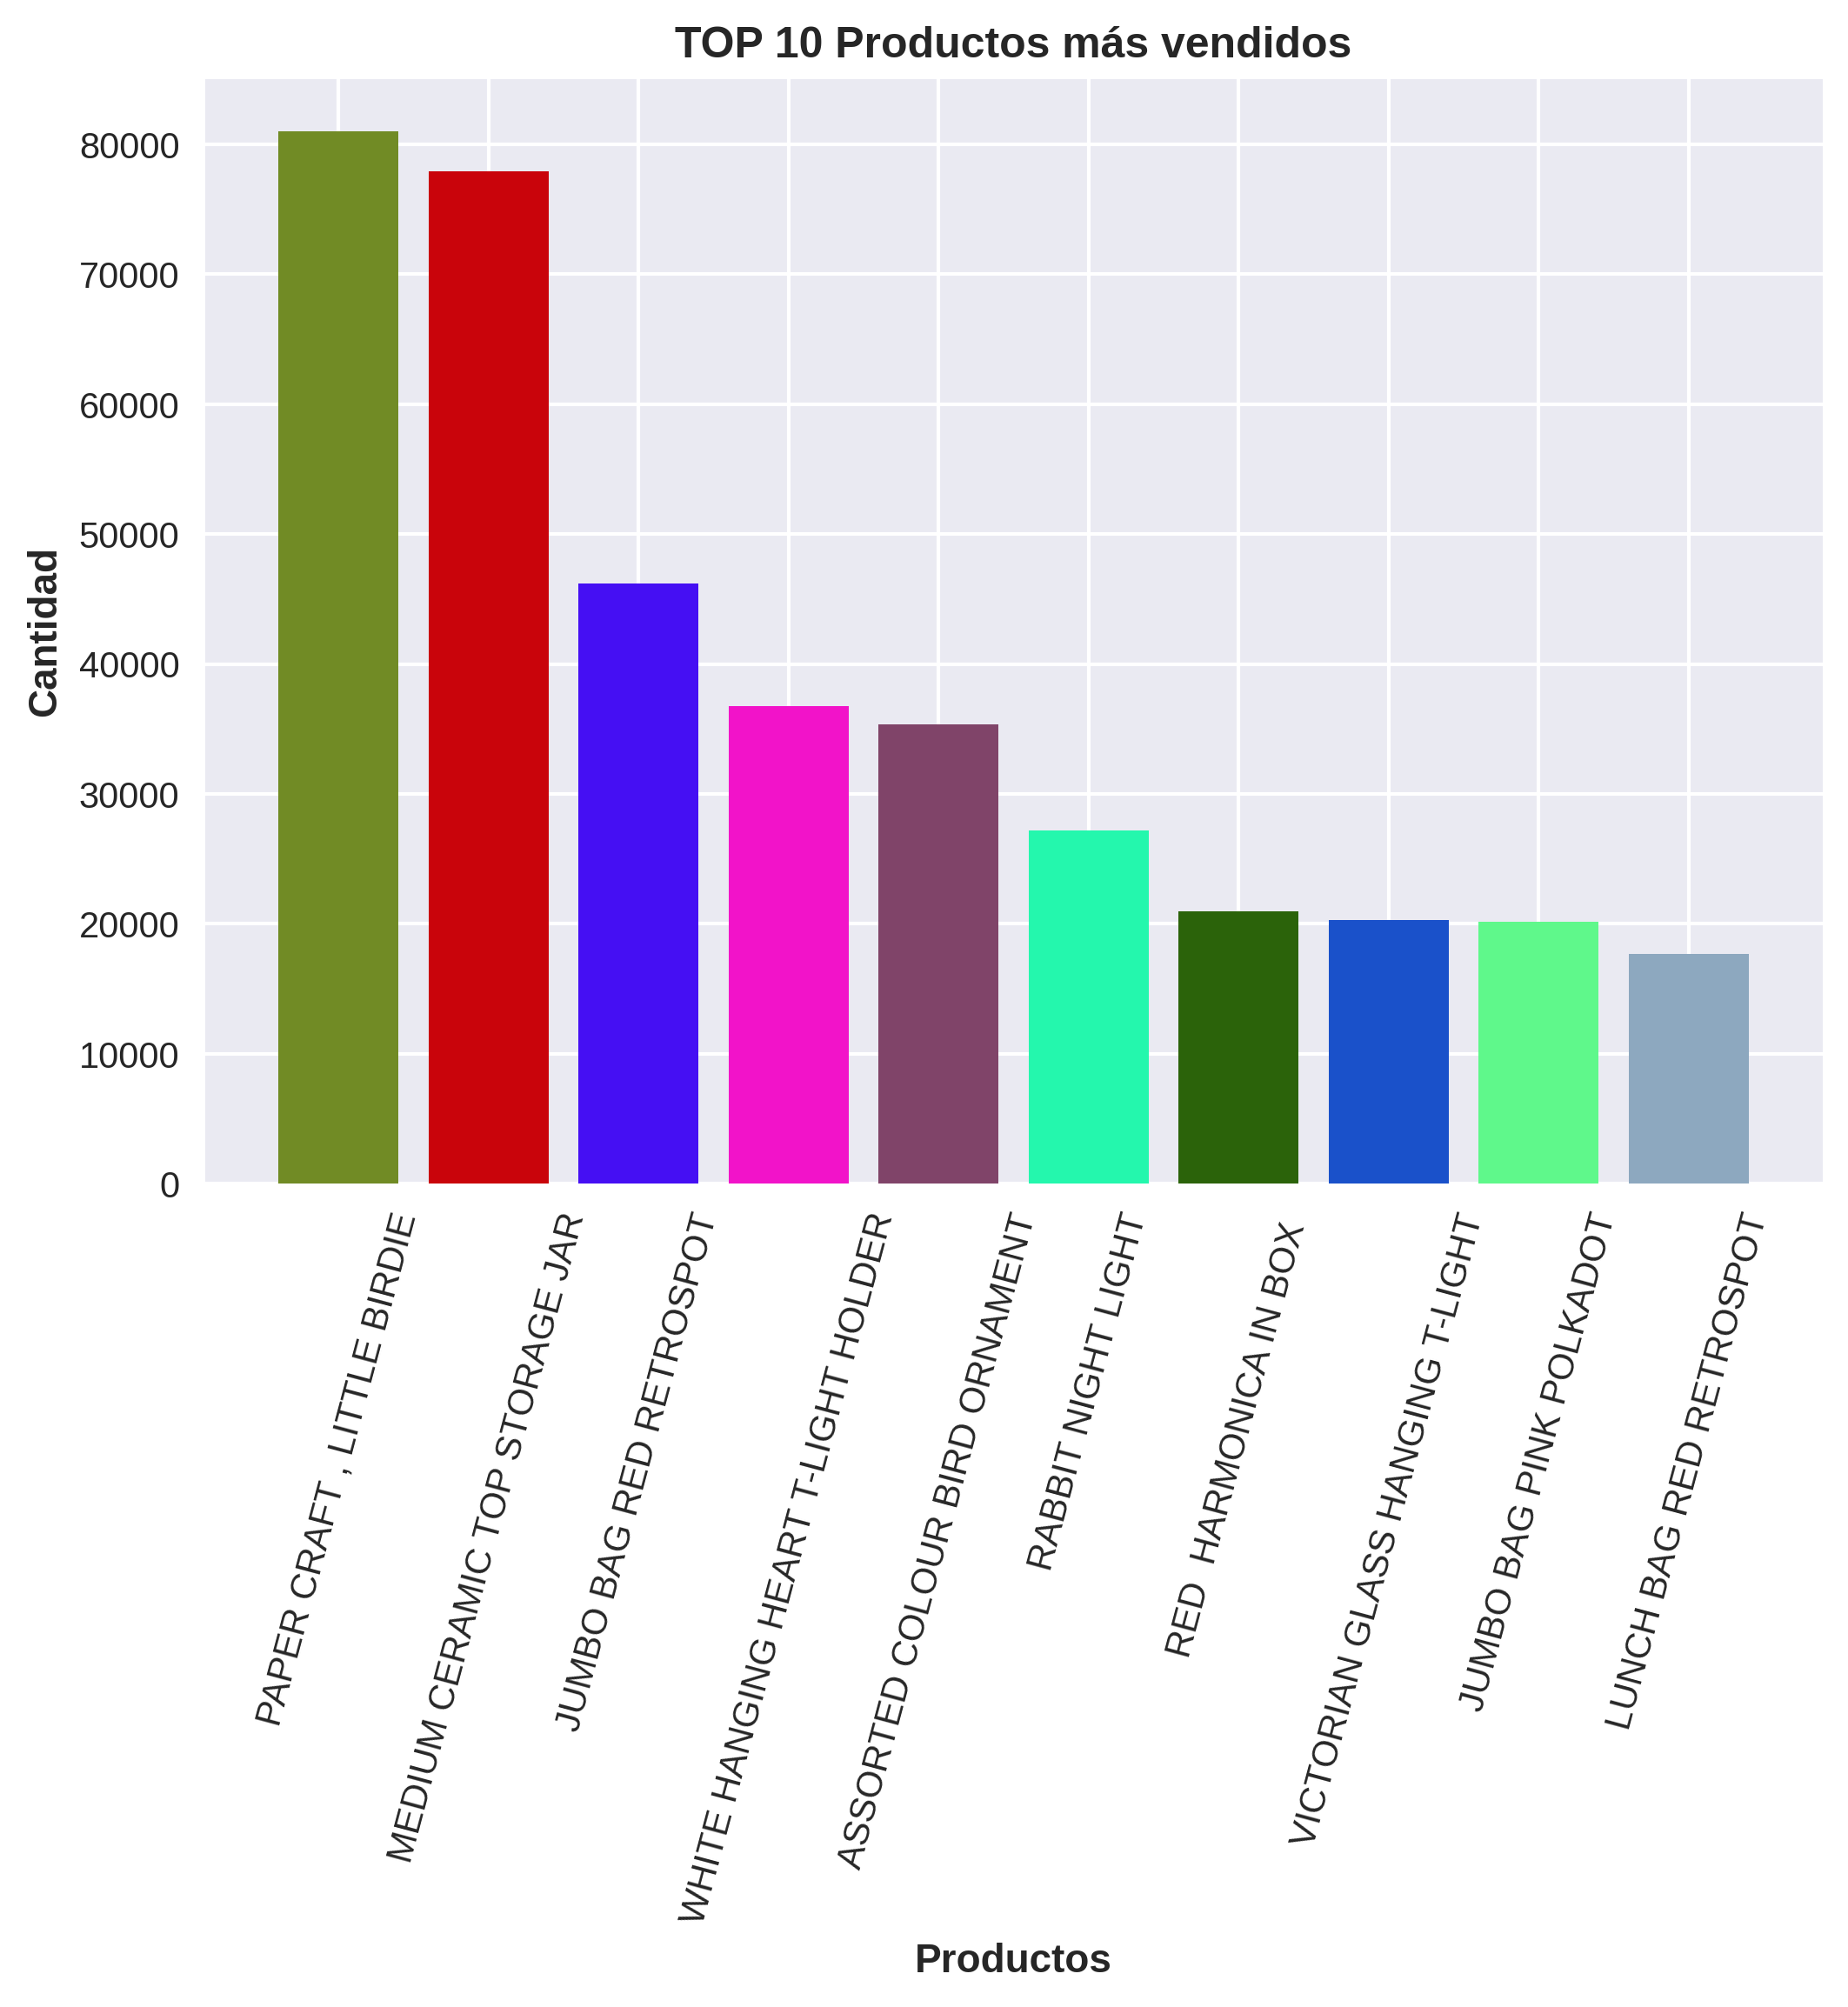

In [ ]:
rand_color = np.random.random(), np.random.random(), np.random.random()

plt.figure(dpi=300)
plt.bar(mostsellprod.index, mostsellprod.values, color=np.random.rand(len(mostsellprod.index),3))
plt.title('TOP 10 Productos más vendidos', fontweight='bold')
plt.xlabel('Productos', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.xticks(rotation= 75)
plt.style.use('seaborn-v0_8')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Pregunta N°2
En esta diapositiva deberán responder la pregunta ¿Existe algún día y horario de compra preferido o de mayor intensidad?

In [ ]:
# transformar fecha para que se visualice los nombre de los dias
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
prefPurchaseTime = df.groupby(df['InvoiceDate'].dt.strftime('%A %H:%M'))['Quantity'].sum()
prefPurchaseTime

,Quantity
InvoiceDate,
Friday 07:36,1996
Friday 07:37,128
Friday 07:39,3515
Friday 07:46,360
Friday 07:48,233
...,...
Wednesday 17:45,80
Wednesday 17:47,492
Wednesday 19:15,196


Reemplazar los dias por numeros, ordenar numero y luego los numeros

In [ ]:
#Reemplazar los dias por numero para luego ordenarlos
df['Day'] = df['InvoiceDate'].dt.strftime('%A')
df['Hour'] = df['InvoiceDate'].dt.strftime('%H')
df['Day'] = df['Day'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Sunday': 6})
df

<ipython-input-95-acc1411bb6c7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day'] = df['Day'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,'Sunday': 6})


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,08
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08
...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,5,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12


In [ ]:
df['Day'].unique()

array([3, 4, 5, 6, 1, 2])

In [ ]:
#Creacion variable para generar grafico de tiempo y hora
pivot = df.pivot_table(index='Hour', columns='Day', values='Quantity', aggfunc='sum').sort_values(by=['Hour'], ascending=False).fillna(0)
pivot

Day,1,2,3,4,5,6
Hour,,,,,,
20,0.0,0.0,4878.0,1817.0,7.0,0.0
19,0.0,0.0,476.0,14165.0,81.0,0.0
18,0.0,98.0,0.0,36150.0,25.0,0.0
17,11073.0,9328.0,7747.0,36941.0,10029.0,0.0
16,25449.0,25850.0,28818.0,48365.0,16397.0,13299.0
15,45028.0,57173.0,57526.0,80251.0,34742.0,43080.0
14,62843.0,54719.0,62732.0,66027.0,56263.0,35411.0
13,75239.0,73077.0,82997.0,66616.0,56331.0,45250.0
12,62078.0,88218.0,97122.0,99445.0,78468.0,51713.0


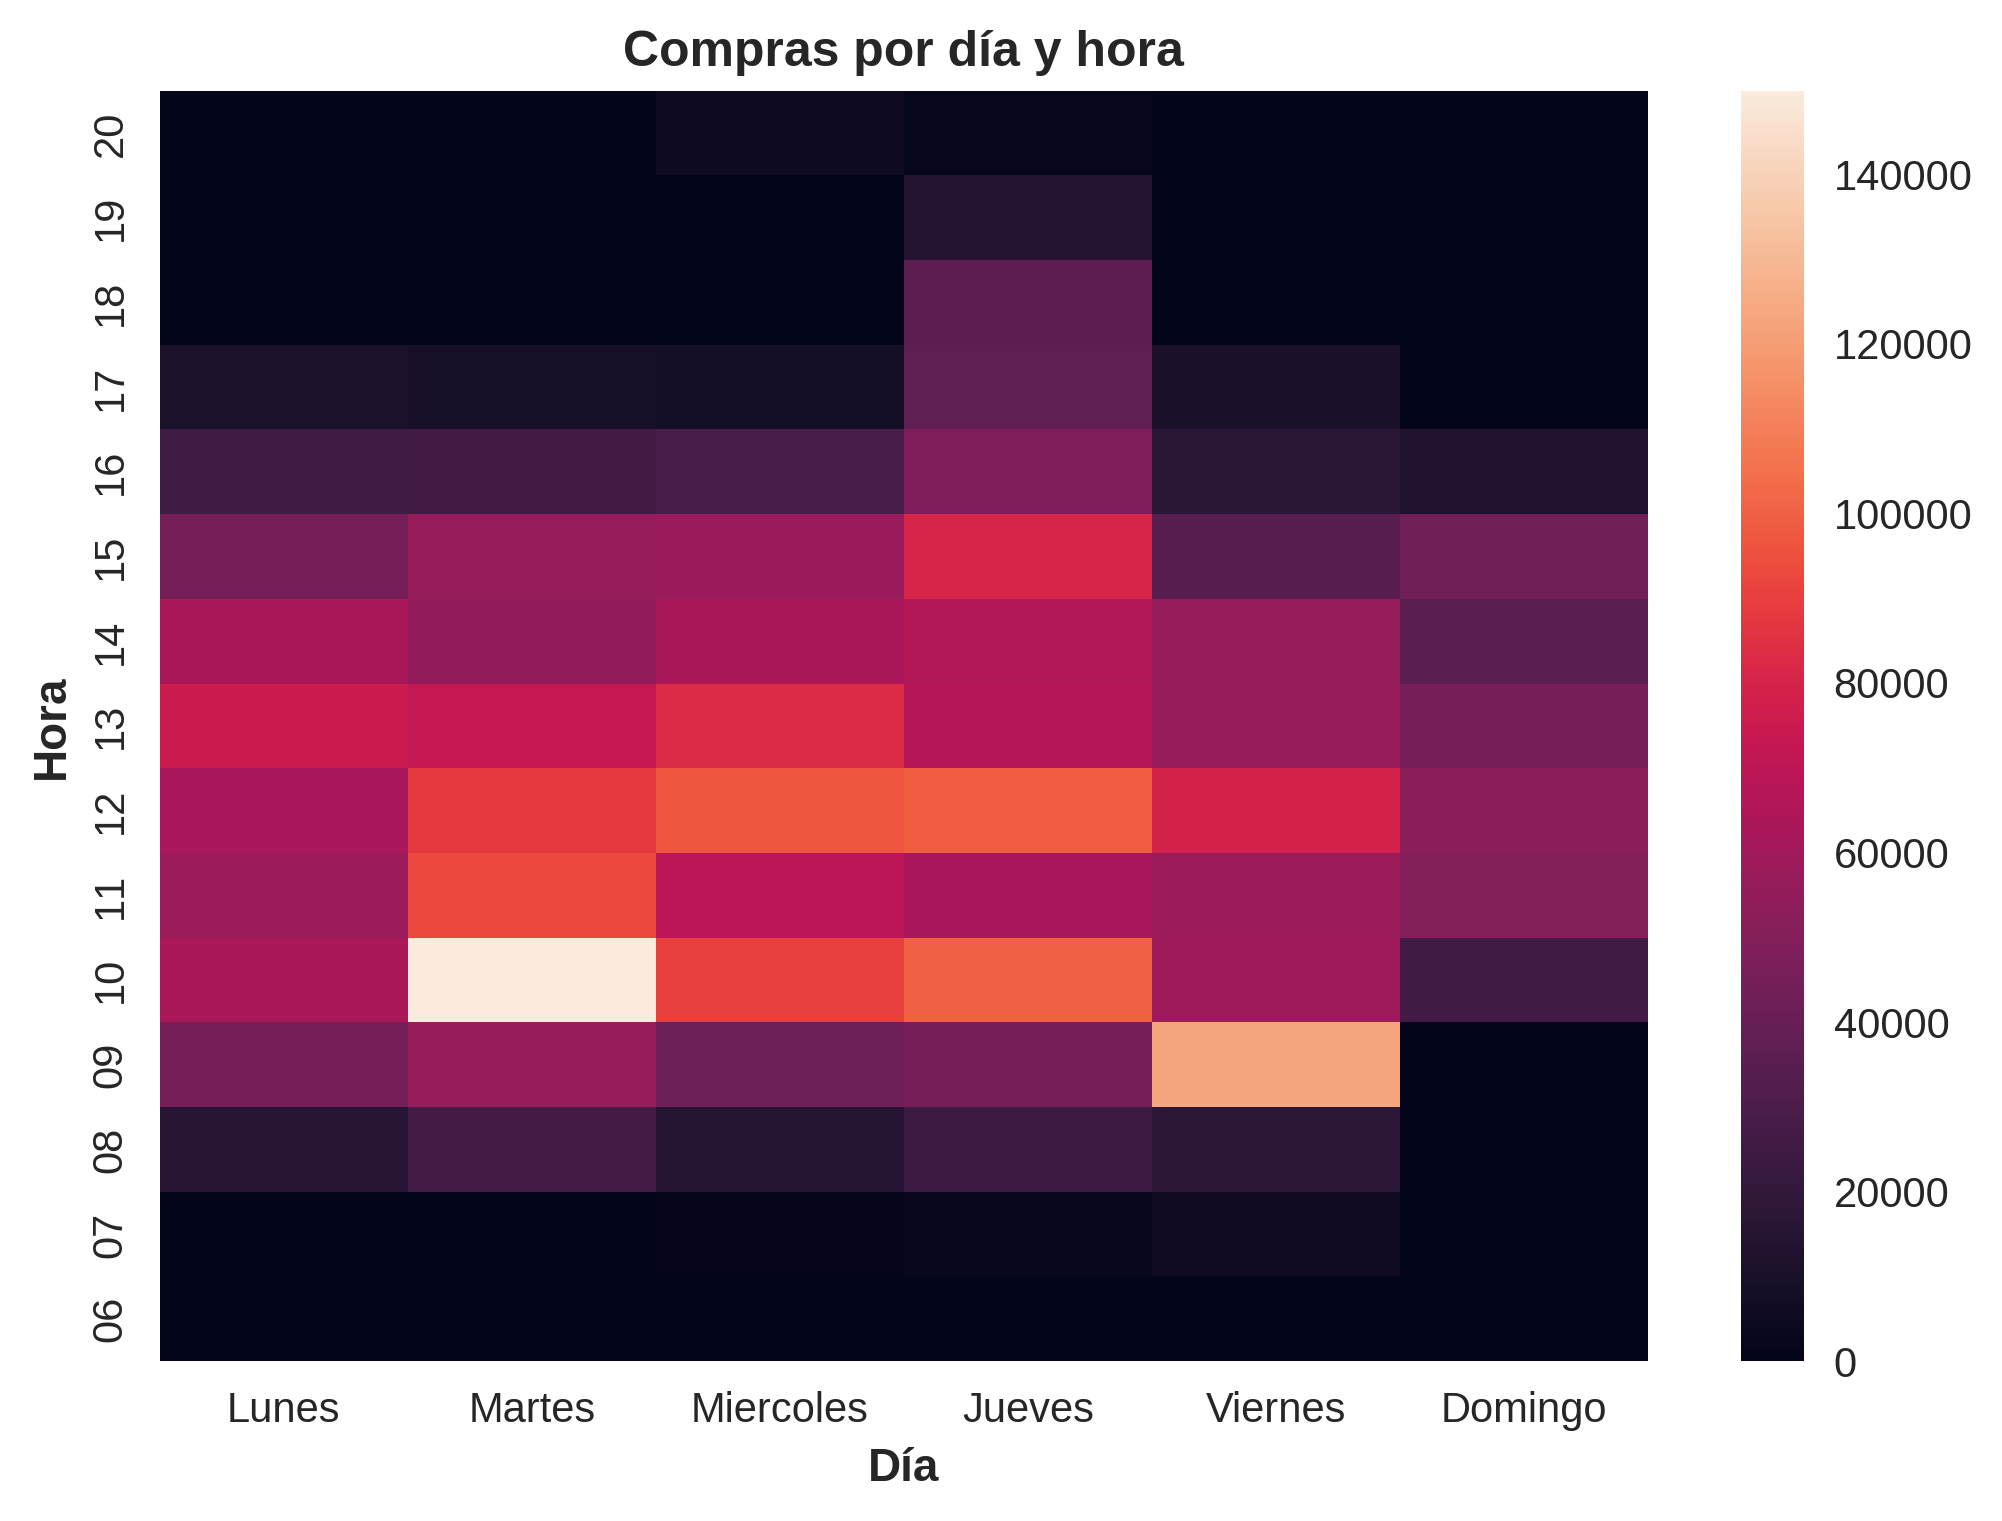

In [ ]:
#Grafico de calculo tiempo y hora
plt.figure(dpi=300)
ax = sns.heatmap(pivot, cmap='rocket',xticklabels=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Domingo'])
ax.set_title('Compras por día y hora', fontweight='bold')
ax.set_xlabel('Día', fontweight='bold')
ax.set_ylabel('Hora', fontweight='bold')
plt.show()

# Pregunta N°3

¿Qué comportamiento de consumo (gasto, frecuencia y recencia) presentan los mejores clientes? Para esto deben primero preprocesar el dataset agrupando por usuario y agregando las siguientes variables:

Recencia: Cantidad de días desde la última compra\
Frecuencia: Total de compras (InvoiceNo distintos)\
Gasto: Total gastado (Quantity * UnitPrice)\
Fidelidad: Cantidad de días entre primera y última compra

In [ ]:
#Creacion de columna de monto gastado por compra
df['Spent'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Hour,Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,08,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3,08,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12,16.60
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,5,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12,16.60


In [ ]:
df['CustomerID'].nunique()

4295

In [ ]:
#Total gastado por cliente
customerspent = df.groupby('CustomerID')['Spent'].sum()

In [ ]:
#Total de compras de clientes
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [ ]:
#Cantidad de de dias entre primera y ultima compra
fidelity = (df.groupby('CustomerID')['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].min()).dt.days

In [ ]:
#Cantidad de días desde la última compra
resilence  =  (df['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days

In [ ]:
#Variable para generar grafico
bubbleplot = pd.concat([customerspent, frequency, fidelity, resilence], axis=1)
bubbleplot.columns = ['Spent', 'Frequency', 'Fidelity', 'Resilence']
bubbleplot.reset_index(inplace=True)
bubbleplot = bubbleplot.sort_values(by='Spent', ascending=False).head(50)
bubbleplot

,CustomerID,Spent,Frequency,Fidelity,Resilence
4160,18102.0,257518.90,60,366,0
1672,14646.0,241148.31,71,353,1
3694,17450.0,192236.59,45,359,7
2981,16446.0,168472.50,2,204,0
1861,14911.0,121990.85,199,372,0
54,12415.0,110334.21,20,313,23
1318,14156.0,107573.14,54,319,9
3737,17511.0,77796.46,30,370,2
0,12346.0,77183.60,1,0,325
2679,16029.0,76512.84,62,335,38


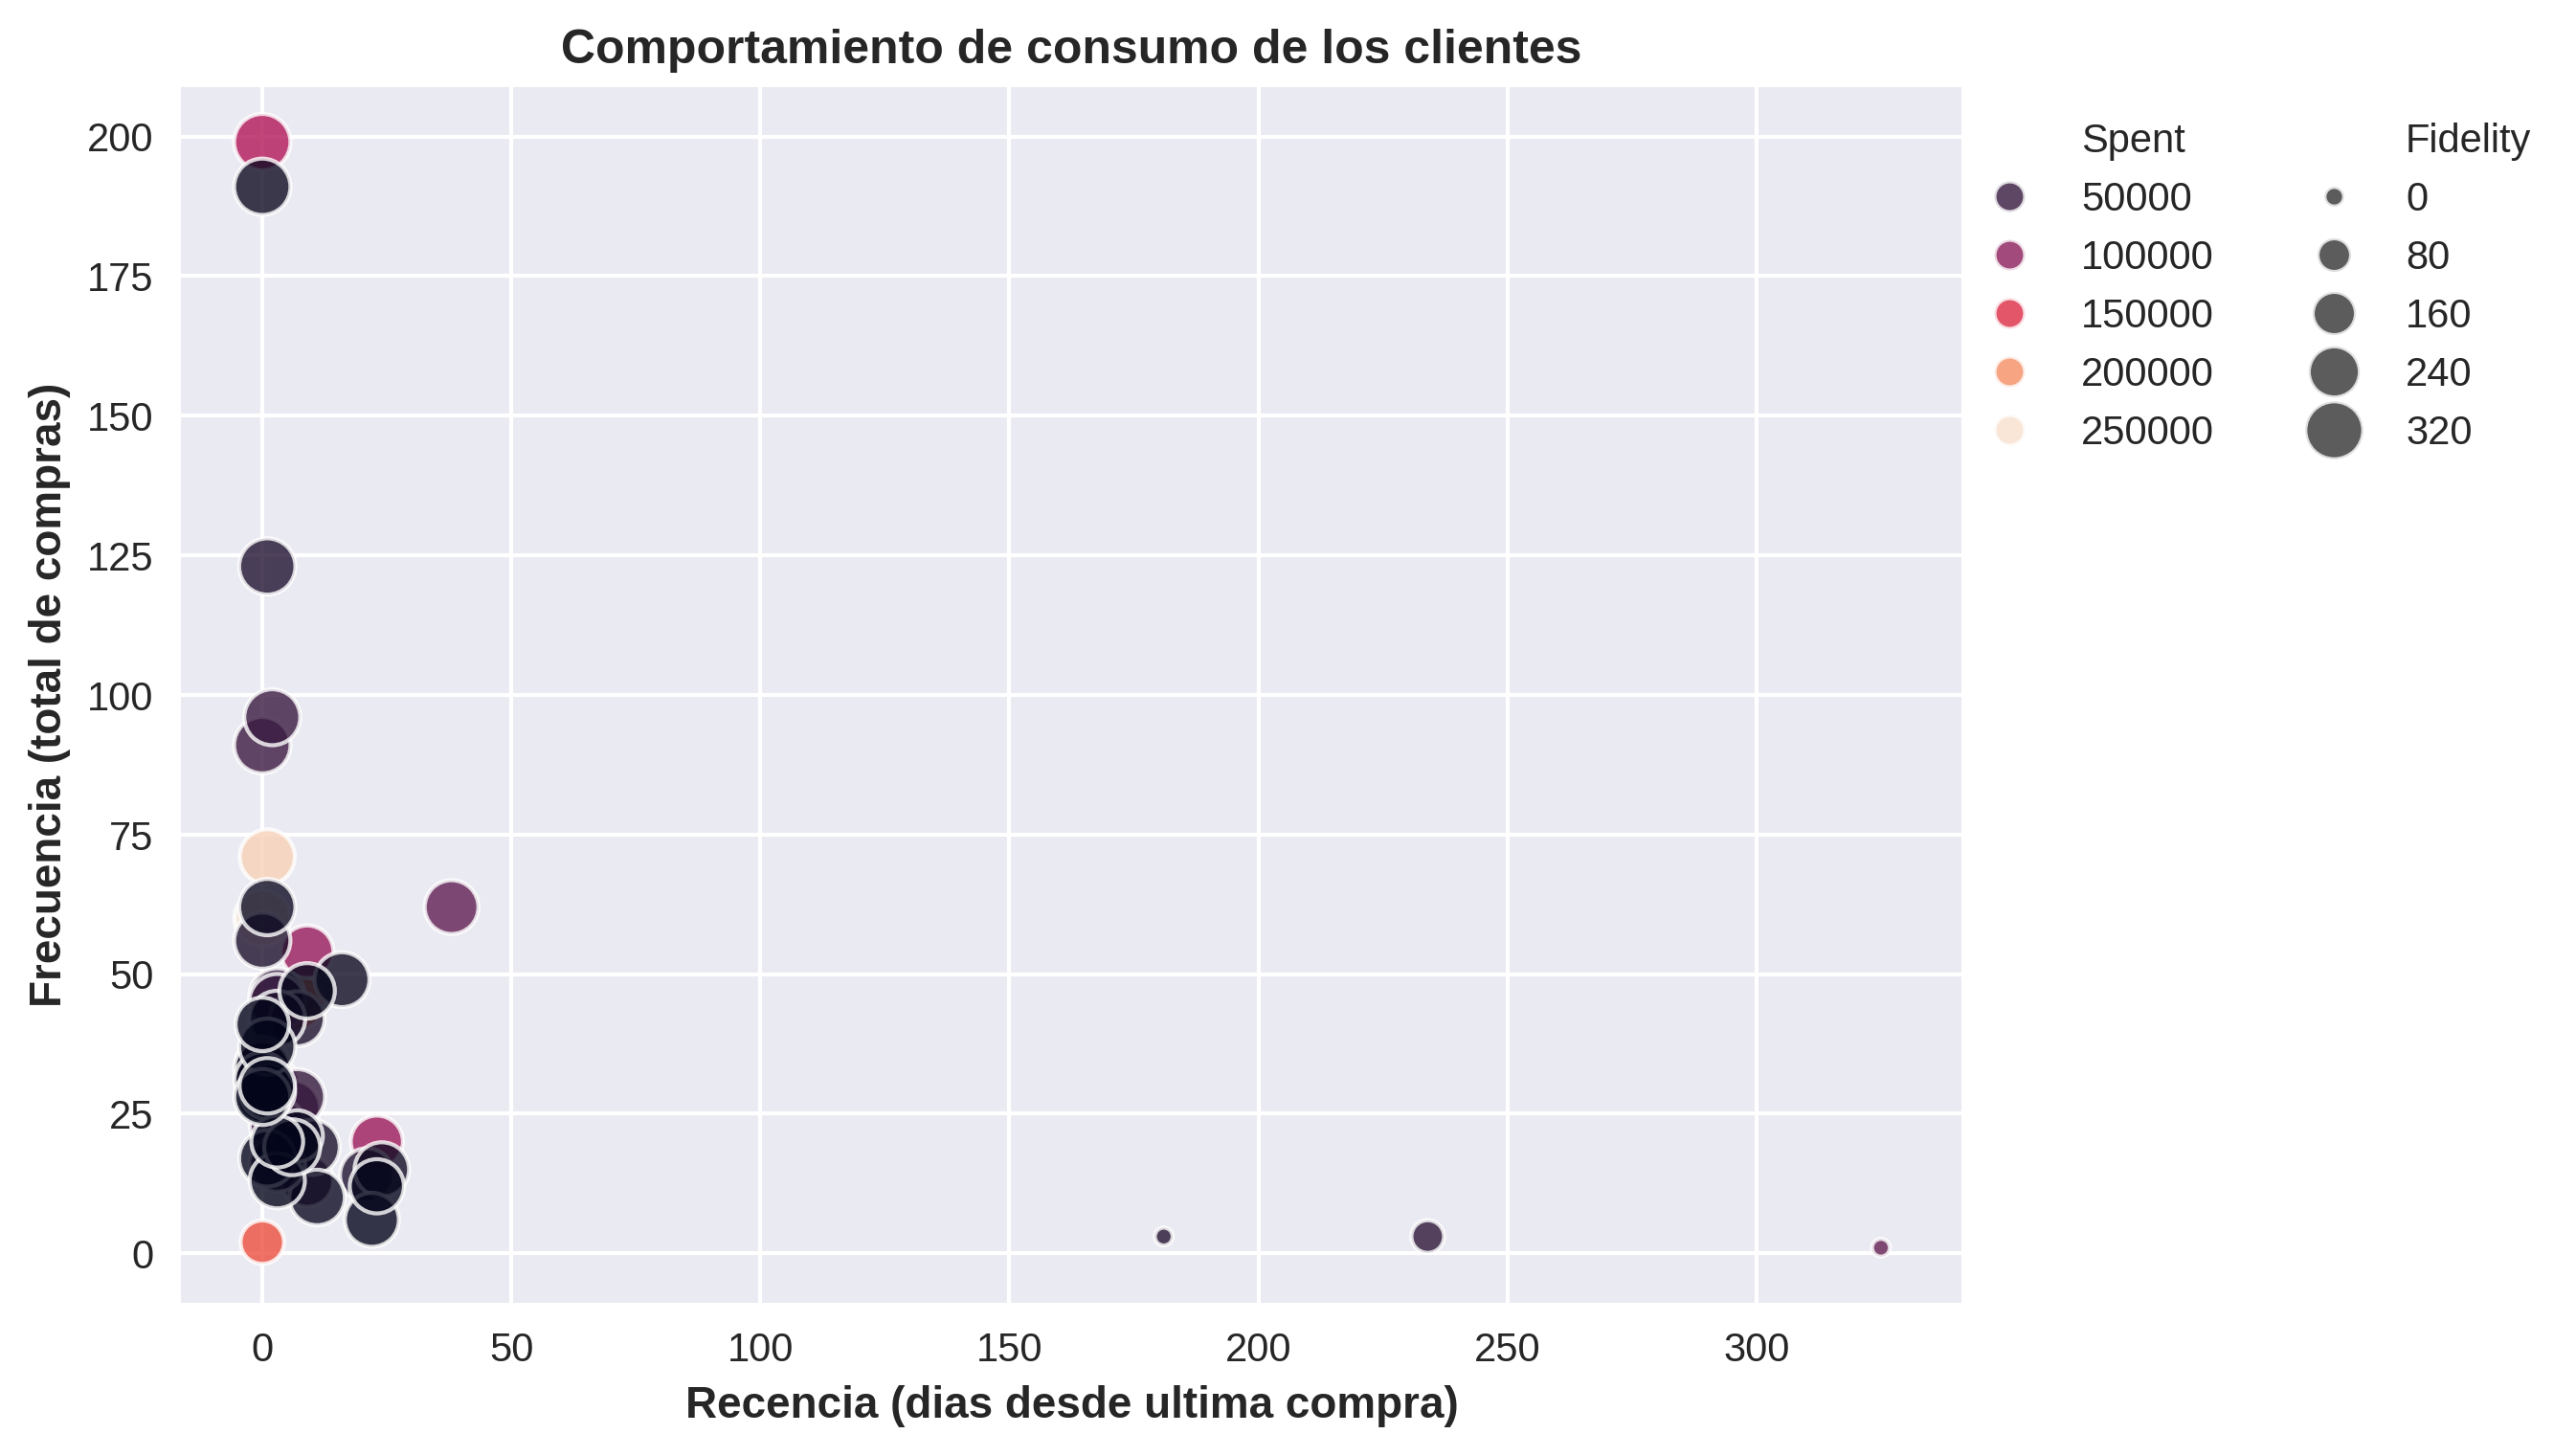

In [ ]:
# Grafico de comportamiento mendiante la variable creada
plt.figure(dpi=300)
sns.scatterplot(data=bubbleplot, x='Resilence', y='Frequency', size='Fidelity', hue='Spent', palette='rocket',alpha =0.8, legend=True, sizes=(20, 200))

plt.legend(bbox_to_anchor=(1.34, 1), ncol=2, shadow= False, markerscale = 1.1, facecolor = 'inherit')
plt.title("Comportamiento de consumo de los clientes", fontweight='bold')
plt.xlabel("Recencia (dias desde ultima compra)", fontweight='bold')
plt.ylabel("Frecuencia (total de compras)", fontweight='bold')

plt.show()

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Hour,Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,08,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3,08,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,08,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12,16.60
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,5,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,5,12,16.60
